# Machine Learning Classification Model

In [ ]:
???

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
...,...,...
2023-03-14,UP,DOWN
2023-03-15,UP,UP


## Load the data

In [1]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143,UP
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692,UP
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100,1.286112,UP
2016-12-13,57.427836,58.273172,57.188938,57.868881,35718900,-0.478622,DOWN
2016-12-14,57.887258,58.300739,57.455399,57.593227,30352700,-0.159789,DOWN
...,...,...,...,...,...,...,...
2023-03-09,255.820007,259.559998,251.580002,252.320007,26653400,-1.500467,DOWN
2023-03-10,251.080002,252.789993,247.600006,248.589996,28321800,2.099087,UP
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700,2.634307,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [2]:
target = df.change_tomorrow_direction
target

Date
2016-12-08      UP
2016-12-09      UP
2016-12-12      UP
2016-12-13    DOWN
2016-12-14    DOWN
              ... 
2023-03-09    DOWN
2023-03-10      UP
2023-03-13      UP
2023-03-14      UP
2023-03-15      UP
Name: change_tomorrow_direction, Length: 1576, dtype: object

In [4]:
explanatory = df.drop(columns=['change_tomorrow', 'change_tomorrow_direction'])
explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100
2016-12-13,57.427836,58.273172,57.188938,57.868881,35718900
2016-12-14,57.887258,58.300739,57.455399,57.593227,30352700
...,...,...,...,...,...
2023-03-09,255.820007,259.559998,251.580002,252.320007,26653400
2023-03-10,251.080002,252.789993,247.600006,248.589996,28321800
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700


### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X=explanatory, y=target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Visualize the model

[Text(0.6083934987774332, 0.9857142857142858, 'Close <= 228.415\ngini = 0.497\nsamples = 1576\nvalue = [727.0, 849.0]'),
 Text(0.5228064617127862, 0.9571428571428572, 'Close <= 219.766\ngini = 0.491\nsamples = 1068\nvalue = [461, 607]'),
 Text(0.5655999802451097, 0.9714285714285715, 'True  '),
 Text(0.42881903029580154, 0.9285714285714286, 'Volume <= 44742700.0\ngini = 0.493\nsamples = 1030\nvalue = [452, 578]'),
 Text(0.2980960758587786, 0.9, 'Volume <= 32050200.0\ngini = 0.489\nsamples = 918\nvalue = [390, 528]'),
 Text(0.12644024332061068, 0.8714285714285714, 'Low <= 209.642\ngini = 0.495\nsamples = 739\nvalue = [333, 406]'),
 Text(0.12033337309160305, 0.8428571428571429, 'Volume <= 31751600.0\ngini = 0.493\nsamples = 722\nvalue = [319, 403]'),
 Text(0.11727993797709924, 0.8142857142857143, 'Low <= 56.996\ngini = 0.492\nsamples = 716\nvalue = [313, 403]'),
 Text(0.11422650286259542, 0.7857142857142857, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.12033337309160305, 0.78571428

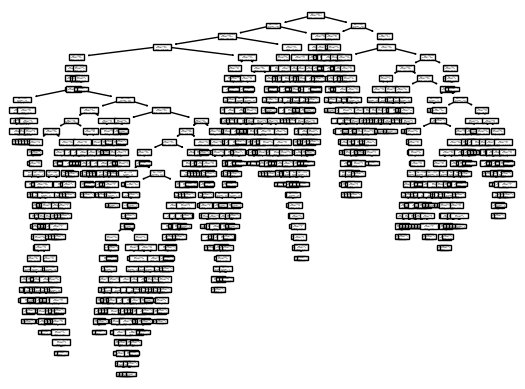

In [7]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_)

### Calculate the predictions

In [44]:
predictions = model_dt.predict(explanatory)

In [45]:
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = predictions
df_predictions

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
2016-12-12,UP,UP
2016-12-13,DOWN,DOWN
2016-12-14,DOWN,DOWN
...,...,...
2023-03-09,DOWN,DOWN
2023-03-10,UP,UP
2023-03-13,UP,UP


### Evaluate the model: compare predictions with the reality

In [46]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction
comp

Date
2016-12-08    True
2016-12-09    True
2016-12-12    True
2016-12-13    True
2016-12-14    True
              ... 
2023-03-09    True
2023-03-10    True
2023-03-13    True
2023-03-14    True
2023-03-15    True
Length: 1576, dtype: bool

In [47]:
model_accuracy = comp.sum() / len(comp)
model_accuracy

np.float64(1.0)

In [51]:
model_dt.score(X=explanatory, y=target)

1.0

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [61]:
import os
import pickle

In [ ]:
os.mkdir('models')

In [62]:

with open('models/my_model.pkl', 'wb') as f:
    pickle.dump(model_dt, f)

# Predict stock prince with decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model_dt = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(
  explanatory,
  target,
  test_size=0.20,
  random_state=42
)

model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

        DOWN       0.43      0.43      0.43       147
          UP       0.50      0.50      0.50       169

    accuracy                           0.47       316
   macro avg       0.46      0.46      0.46       316
weighted avg       0.47      0.47      0.47       316



# Predict stock price with Logistic Regression model

In [50]:
# Initialize LogisticRegression model
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

from sklearn.model_selection import train_test_split

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(
  explanatory,
  target,
  test_size = 0.2,
  random_state= 42
)

# Model training with train data
model_lr.fit(X_train, y_train)

# Model prediction with test data
y_pred = model_lr.predict(X_test)

from sklearn.metrics import classification_report

# Model evaluation
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

        DOWN       0.00      0.00      0.00       148
          UP       0.53      1.00      0.69       168

    accuracy                           0.53       316
   macro avg       0.27      0.50      0.35       316
weighted avg       0.28      0.53      0.37       316



/home/mlovera/personal/learn/algorithmic-trading/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mlovera/personal/learn/algorithmic-trading/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mlovera/personal/learn/algorithmic-trading/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr